## hipotesis 1

### Normaliza primero solicitudes

In [2]:
import pandas as pd

df_solicitudes = pd.read_csv("./data/solicitudes_vivienda_th.csv", sep=";")
df_poblacion = pd.read_csv("./data/poblacion_th.csv", sep=";")

In [ ]:
columnas = ["Entidad"] + [str(a) for a in range(2023, 2012, -1)]
df_solicitudes = df_solicitudes[columnas]
df_poblacion = df_poblacion[columnas]

In [6]:
sol_long = df_solicitudes.melt(id_vars="Entidad", var_name="Año", value_name="Solicitudes_x_1000")
pop_long = df_poblacion.melt(id_vars="Entidad", var_name="Año", value_name="Poblacion_total")

In [5]:
df = sol_long.merge(pop_long, on=["Entidad", "Año"])

In [7]:
df["Solicitudes_totales"] = (df["Solicitudes_x_1000"].astype(float) * df["Poblacion_total"].astype(float)) / 1000

In [ ]:
df.to_csv("./data/hipotesis_1.csv", index=False)

In [ ]:
df = pd.read_csv("./data/hipotesis_1.csv")

df_pivot = df.pivot(index="Entidad", columns="Año", values="Solicitudes_totales")

df_pivot.to_csv("./data/hipotesis_1_pivot.csv")


In [12]:
df = pd.read_csv("./data/hipotesis_1_pivot.csv", index_col=0)

columnas_ordenadas = sorted([str(col) for col in df.columns if col.isnumeric()], reverse=True)
df = df[columnas_ordenadas]

df.to_csv("./data/hipotesis_1_ordenado.csv")


In [ ]:
df = df.round().astype(int)

df.to_csv("./data/hipotesis_1_solic.csv")

### Normaliza licencias

In [17]:
import pandas as pd

df_licencias = pd.read_csv("./data/licencias_final_th.csv", sep=";")
df_poblacion = pd.read_csv("./data/poblacion_th.csv", sep=";")

In [ ]:
import pandas as pd

df_lic = pd.read_csv("./data/licencias_final_th.csv", index_col="Entidad")

df_pob = pd.read_csv("./data/poblacion_th.csv",  sep=";", index_col="Entidad")

columnas = [str(año) for año in range(2023, 2012, -1)]
df_lic = df_lic[columnas]
df_pob = df_pob[columnas]

df_lic_total = (df_lic.astype(float) * df_pob.astype(float)) / 1000

df_lic_total = df_lic_total.round().astype(int)

df_lic_total.to_csv("./data/licencias_totales_normalizadas.csv")


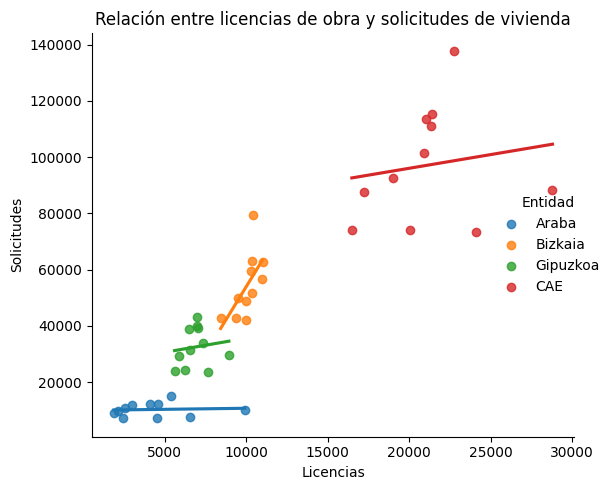

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


df_lic = pd.read_csv("./data/licencias_totales_normalizadas.csv", index_col="Entidad")
df_sol = pd.read_csv("./data/hipotesis_1_ordenado.csv", index_col="Entidad")


df_lic_t = df_lic.T
df_sol_t = df_sol.T

df_comb = pd.DataFrame({
    'Año': df_lic_t.index,
    'Araba_lic': df_lic_t['Araba'],
    'Araba_sol': df_sol_t['Araba'],
    'Bizkaia_lic': df_lic_t['Bizkaia'],
    'Bizkaia_sol': df_sol_t['Bizkaia'],
    'Gipuzkoa_lic': df_lic_t['Gipuzkoa'],
    'Gipuzkoa_sol': df_sol_t['Gipuzkoa'],
    'CAE_lic': df_lic_t['CAE'],
    'CAE_sol': df_sol_t['CAE'],
})

df_long = pd.DataFrame()

for entidad in ['Araba', 'Bizkaia', 'Gipuzkoa', 'CAE']:
    temp = df_comb[['Año', f'{entidad}_lic', f'{entidad}_sol']].copy()
    temp.columns = ['Año', 'Licencias', 'Solicitudes']
    temp['Entidad'] = entidad
    df_long = pd.concat([df_long, temp], ignore_index=True)

sns.lmplot(data=df_long, x="Licencias", y="Solicitudes", hue="Entidad", ci=None)
plt.title("Relación entre licencias de obra y solicitudes de vivienda")
plt.tight_layout()
plt.show()


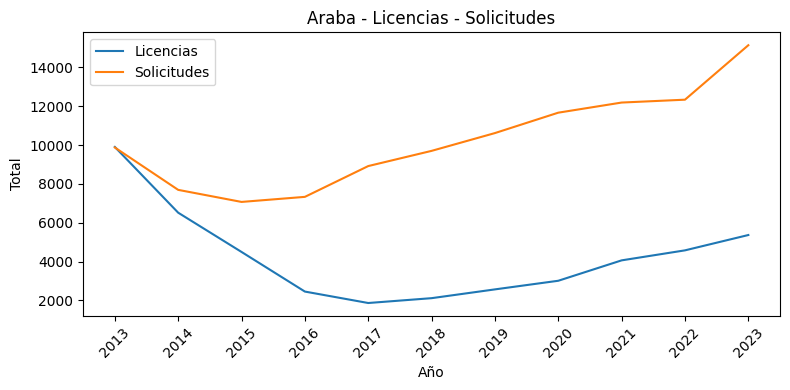

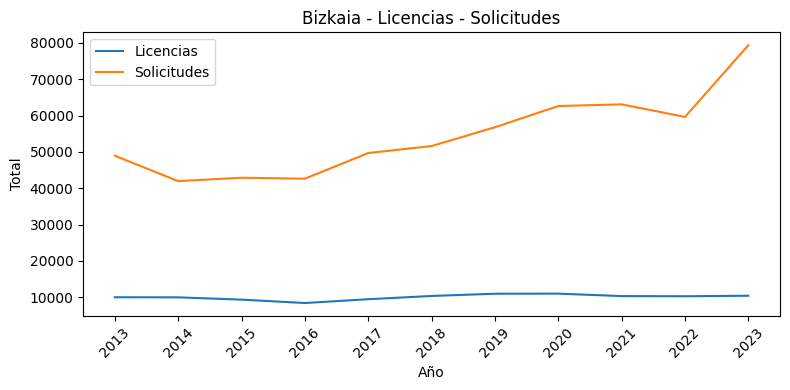

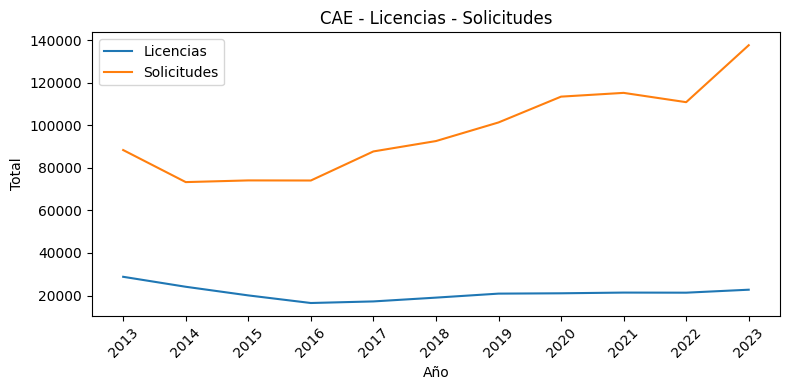

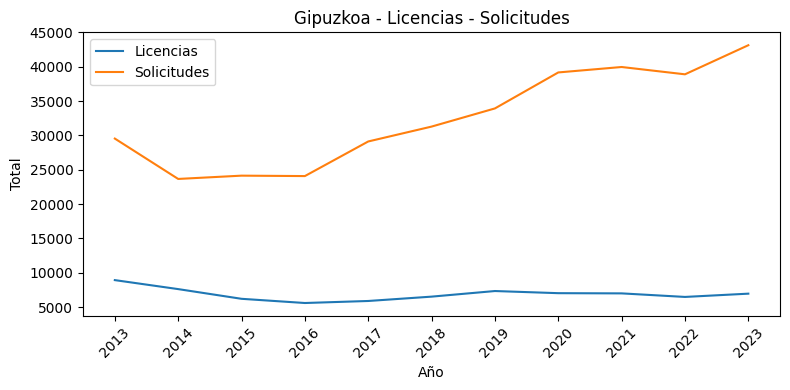

In [34]:
df_lic = pd.read_csv("./data/licencias_totales_normalizadas.csv", index_col="Entidad")
df_sol = pd.read_csv("./data/hipotesis_1_ordenado.csv", index_col="Entidad")

df_lic_t = df_lic.T
df_sol_t = df_sol.T

df_lic_t = df_lic_t.sort_index(ascending=False)
df_sol_t = df_sol_t.sort_index(ascending=False)

for entidad in df_lic.index:
    plt.figure(figsize=(8, 4))
    plt.plot(df_lic_t.index, df_lic_t[entidad], label="Licencias")
    plt.plot(df_sol_t.index, df_sol_t[entidad], label="Solicitudes")
    plt.title(f"{entidad} - Licencias - Solicitudes")
    plt.xlabel("Año")
    plt.ylabel("Total")
    plt.xticks(rotation=45)
    plt.gca().invert_xaxis() 
    plt.legend()
    plt.tight_layout()
    plt.savefig(f"img/hipotesis_1/{entidad.lower()}_licencias_vs_solicitudes.png", dpi=300)
    plt.show()



# Hipotesis 1

<Figure size 1000x600 with 0 Axes>

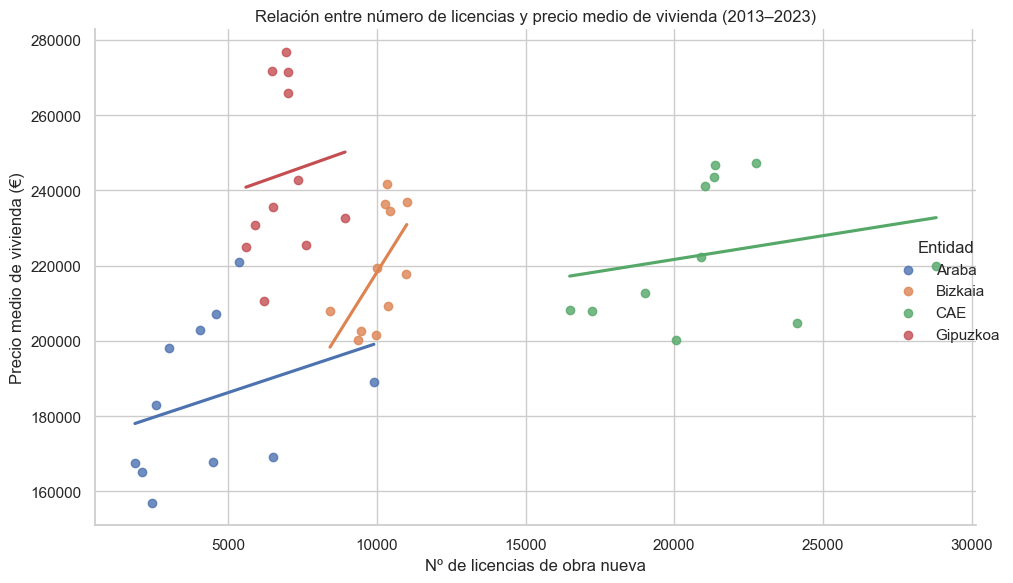

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


licencias_data = {
    'Entidad': ['Araba', 'Bizkaia', 'CAE', 'Gipuzkoa'],
    '2023': [5369, 10433, 22736, 6961],
    '2022': [4580, 10287, 21340, 6485],
    '2021': [4065, 10331, 21384, 7002],
    '2020': [3015, 11008, 21051, 7032],
    '2019': [2571, 10983, 20896, 7344],
    '2018': [2119, 10369, 19014, 6528],
    '2017': [1870, 9469, 17232, 5895],
    '2016': [2459, 8428, 16485, 5600],
    '2015': [4498, 9360, 20059, 6212],
    '2014': [6519, 9989, 24119, 7625],
    '2013': [9903, 10012, 28806, 8934],
}
df_licencias = pd.DataFrame(licencias_data)
df_licencias = df_licencias.melt(id_vars='Entidad', var_name='Año', value_name='Licencias')

precios_data = {
    'Entidad': ['CAE', 'Araba', 'Bizkaia', 'Gipuzkoa'],
    '2024': [255409, 223684, 241137, 290299],
    '2023': [247215, 221107, 234636, 276813],
    '2022': [243582, 207139, 236410, 271810],
    '2021': [246831, 202849, 241696, 271372],
    '2020': [241276, 198174, 237037, 265791],
    '2019': [222329, 182892, 217864, 242862],
    '2018': [212776, 165228, 209359, 235730],
    '2017': [208044, 167638, 202720, 230886],
    '2016': [208165, 157015, 208024, 224899],
    '2015': [200154, 167763, 200141, 210554],
    '2014': [204741, 169160, 201504, 225429],
    '2013': [219858, 188964, 219383, 232728],
    '2012': [234881, 196940, 247993, 240708],
}
df_precios = pd.DataFrame(precios_data)
df_precios = df_precios.melt(id_vars='Entidad', var_name='Año', value_name='Precio')

# Convertir año a numérico y filtrar solo 2013–2023
df_licencias["Año"] = df_licencias["Año"].astype(int)
df_precios["Año"] = df_precios["Año"].astype(int)

df_licencias = df_licencias[df_licencias["Año"].between(2013, 2023)]
df_precios = df_precios[df_precios["Año"].between(2013, 2023)]

# Unir DataFrames por Entidad y Año
df = pd.merge(df_licencias, df_precios, on=['Entidad', 'Año'])

# === GRAFICAR ===
sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.lmplot(data=df, x='Licencias', y='Precio', hue='Entidad', height=6, aspect=1.5, markers='o', ci=None)
plt.title('Relación entre número de licencias y precio medio de vivienda (2013–2023)')
plt.xlabel('Nº de licencias de obra nueva')
plt.ylabel('Precio medio de vivienda (€)')
plt.tight_layout()
plt.show()


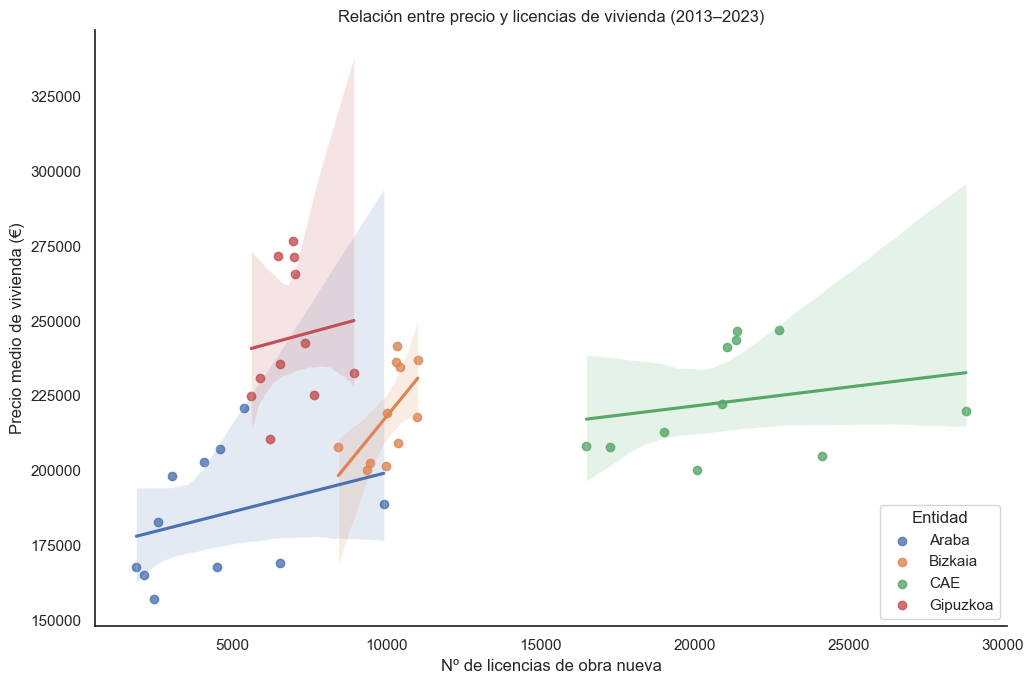

In [11]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

sns.set(style="white")

# Crear el gráfico
g = sns.lmplot(
    data=df,
    x="Licencias",
    y="Precio",
    hue="Entidad",
    markers='o',
    height=7,
    aspect=1.5,
    legend=False  
)

g.set_axis_labels("Nº de licencias de obra nueva", "Precio medio de vivienda (€)")
plt.title("Relación entre precio y licencias de vivienda (2013–2023)")

# Añadir solo una leyenda personalizada abajo a la derecha
plt.legend(title='Entidad', loc='lower right')

plt.tight_layout()
plt.savefig("./img/hipotesis_1/precio-licencias.png", dpi=300)

plt.show()


Año - Precios

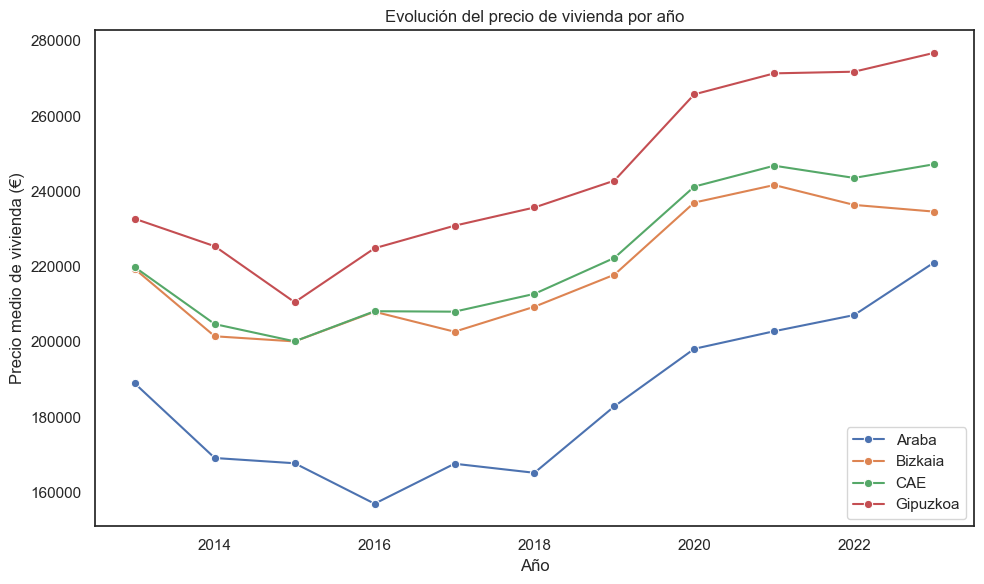

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

os.makedirs("./img", exist_ok=True)

# Asumiendo que ya tienes el DataFrame df listo
sns.set(style="white")

plt.figure(figsize=(10, 6))
ax = sns.lineplot(data=df, x="Año", y="Precio", hue="Entidad", marker="o")
plt.title("Evolución del precio de vivienda por año")
plt.xlabel("Año")
plt.ylabel("Precio medio de vivienda (€)")
plt.legend(loc='lower right')

# Guardar
plt.savefig("./img/hipotesis_1_precio_por_año.png", dpi=300)
plt.tight_layout()
plt.show()
